# Activation Function

#### datascienceschool.net, ratsgo.github.io, 밑바닥부터 시작하는 딥러닝, CS231n을 참고했습니다.

---

- 활성화 함수란?
    - 활성화 함수(activation function)은 입력 신호의 총합을 출력 신호로 변환하는 함수입니다. 
    - 활성화 함수는 입력 신호 총합의 활성화 여부를 결정하는 역할을 합니다. 

$$a = b + w_1x_1 + w_2x_2$$
$$y = h(a)$$

- 활성화 함수의 종류

    1. 시그모이드 함수(sigmoid function)
        - 시그모이드 함수는 비선형 함수로 아래와 같은 식을 지니는 함수입니다. 시그모이드 함수는 특정 임계값을 기준으로 출력을 분류합니다. 
        - 입력값이 크거나 작을 때 - 시그모이드 함수에서 1 혹은 0으로 수렴하기 시작하는 부분 - 는 그래디언트값이 지나치게 작아지고, 연산이 무거워집니다. 
        - 범위가 [0, 1] 이기 때문에 그래디언트가 양수 혹은 음수인지에 따라 loss에 대한 가중치의 그래디언트가 양수 혹은 음수가 됩니다. $$h(x) = \frac{1}{1 + exp(-x)}$$
    2. 하이퍼탄젠트 함수(Hypertangent function)
        - 하이퍼탄젠트 함수는 그레디언트 감소 현상(gradient vanishing problem)을 줄이는 활성화 함수입니다.
        - 시그모이드 함수는 범위가 0부터 1까지인데 반하여, 하이퍼탄젠트 함수는 -1부터 1까지 입니다. 
$$tanh(a) = \frac{e^a - e^-a}{e^a + e^-a} = 2\sigma(2a) - 1$$
$$tanh' (x) = 1 - tanh^2 (x)$$
    3. 렐루 함수(Rectified Linear Unit - ReLU function)
        - 렐루 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수로 아래와 같은 식을 지닙니다. 
        $$h(x) = \begin{cases} x \; (x > 0) \\ 0 \; (x <= 0) \end{cases}$$
        - 가중치의 총합 a가 큰 경우에도 기울기가 1로 유지되기 때문에, a가 커도 그레디언트 감소 현상이 발생하지 않습니다. 
        - 미분도 편리하여 계산복잡도가 낮습니다.  
        - CNN처럼 레이어의 수가 많은 경우에 유용합니다.
    4. Leaky 렐루
        - Leaky 렐루는 렐루 함수의 그래디언트가 죽는 현상을 방지하기 위해 제안되었으며 아래의 식과 같습니다. 
        $$f(x) = \text{max}(0.01x, x)$$
        - x가 음수일 때 그래디언트가 0.01배라는 것을 제외하고는 렐루 함수와 같습니다.

# SETUP

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['font.family'] = 'sans-serif'

In [95]:
file = "/Users/quartz/data/collabo/Consumo_cerveja.csv"
data_raw = pd.read_csv(file)
data_raw.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### eda, data description

- Data : 날짜	
- Temperatura Media (C) : 평균 기온
- Temperatura Minima (C) : 최저 기온
- Temperatura Maxima (C) : 최고 기온
- Precipitacao (mm) : 강수량
- Final de Semana : 주말 여부 - 0.0 주중 1.0 주말
- Consumo de cerveja (litros) : 맥주 판매량(리터)

In [96]:
# 결측치 확인

data_raw.isna().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [97]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 51.5+ KB


### preprocessing

- Nan Value를 제거한다.
- data를 날짜 데이터로 바꾼다.
- 평균기온, 최저기온, 최고기온, 강수량의 ','를 '.'으로 바꾸고 데이터유형을 실수로 바꾼다.
- 특정 날짜를 기준으로 train, test 데이터셋을 만든다.
- MinMax Scaling
- X, y 데이터셋으로 나누기
- 데이터를 윈도우 길이만큼 shifting한다. (5, 7 두번 실험)

##### - 피쳐 이름을 바꾼다

In [ ]:
data_raw.columns = ['Date', 'Average', 'Min', 'Max', 'Rainfall', 'Weekend', 'Consumption']

In [99]:
data_raw.columns

Index(['Date', 'Average', 'Min', 'Max', 'Rainfall', 'Weekend', 'Consumetion'], dtype='object')

##### - Nan Value를 제거한다

In [100]:
# prior

data_raw.isna().sum()

Date           576
Average        576
Min            576
Max            576
Rainfall       576
Weekend        576
Consumetion    576
dtype: int64

In [101]:
print(data_raw.shape, data_raw.dropna().shape) # 전체 데이터샘플에서 Nan Value가 1개라도 속한 데이터샘플을 모두 제거하니, 365개가 되었다.

data_raw.dropna(inplace=True)

print(data_raw.shape)

(941, 7) (365, 7)
(365, 7)


##### - 피쳐 data를 날짜 데이터로 바꾼다

In [102]:
print(type(data_raw.Date[0]))

data_raw.Date = pd.to_datetime(data_raw.Date)

print(type(data_raw.Date[0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [103]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null datetime64[ns]
Average        365 non-null object
Min            365 non-null object
Max            365 non-null object
Rainfall       365 non-null object
Weekend        365 non-null float64
Consumetion    365 non-null float64
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 32.8+ KB


##### - 평균기온, 최저기온, 최고기온, 강수량의 ','를 '.'으로 바꾸고 데이터유형을 실수로 바꾼다.

In [104]:
data_raw.columns

Index(['Date', 'Average', 'Min', 'Max', 'Rainfall', 'Weekend', 'Consumetion'], dtype='object')

In [105]:
import re

for column in data_raw.columns[1:5]:
    data_raw[column] = data_raw[column].apply(lambda x : re.sub(',', '.', x) if re.findall(',', x) else x)
    
data_raw.head(20)

,Date,Average,Min,Max,Rainfall,Weekend,Consumetion
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900
5,2015-01-06,23.78,20.1,30.5,12.2,0.0,28.218
6,2015-01-07,24,19.5,33.7,0,0.0,29.732
7,2015-01-08,24.9,19.5,32.8,48.6,0.0,28.397
8,2015-01-09,28.2,21.9,34,4.4,0.0,24.886
9,2015-01-10,26.76,22.1,34.2,0,1.0,37.937


In [106]:
data_raw.dtypes

Date           datetime64[ns]
Average                object
Min                    object
Max                    object
Rainfall               object
Weekend               float64
Consumetion           float64
dtype: object

In [109]:
for column in data_raw.columns[1:5]:
    data_raw[column] = data_raw[column].astype(np.float)
data_raw.dtypes

Date           datetime64[ns]
Average               float64
Min                   float64
Max                   float64
Rainfall              float64
Weekend               float64
Consumetion           float64
dtype: object

In [124]:
data_raw.index = data_raw.Date
data_raw.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [127]:
data_raw = data_raw.drop('Date', axis=1)
data_raw.tail()

,Average,Min,Max,Rainfall,Weekend,Consumetion
Date,,,,,,
2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467
2015-12-31,24.76,20.2,29.0,0.0,0.0,22.446


In [133]:
# 데이터 저장

data_revise = data_raw.copy()
data_revise.to_pickle('data_revise.pkl')

In [313]:
data_revise

,Average,Min,Max,Rainfall,Weekend,Consumetion
Date,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
2015-01-06,23.78,20.1,30.5,12.2,0.0,28.218
2015-01-07,24.00,19.5,33.7,0.0,0.0,29.732
2015-01-08,24.90,19.5,32.8,48.6,0.0,28.397
2015-01-09,28.20,21.9,34.0,4.4,0.0,24.886


##### - 특정 날짜를 기준으로 train, test 데이터셋을 만든다.

In [141]:
columns = list(data_revise.columns)
columns

['Average', 'Min', 'Max', 'Rainfall', 'Weekend', 'Consumetion']

In [143]:
split_date = pd.Timestamp('2015-09-01')
split_date

Timestamp('2015-09-01 00:00:00')

In [148]:
train_raw = data_revise.loc[:split_date, columns]
test_raw = data_revise.loc[split_date:, columns]
train_raw.shape, test_raw.shape

((244, 6), (122, 6))

##### - MinMax Scaling

In [149]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_sc = scaler.fit_transform(train_raw)
test_sc = scaler.transform(test_raw)

In [152]:
train_sc_df = pd.DataFrame(data=train_sc, columns=train_raw.columns, index=train_raw.index)
test_sc_df = pd.DataFrame(data=test_sc, columns=test_raw.columns, index=test_raw.index)

##### - X, y 데이터셋으로 나누기

In [175]:
X_train_df = train_sc_df.iloc[:, :-1]
y_train_df = train_sc_df.iloc[:, -1:]

X_test_df = test_sc_df.iloc[:, :-1]
y_test_df = test_sc_df.iloc[:, -1:]

##### - 데이터를 윈도우 길이만큼 shifting한다. (5, 7 두번 실험) - 보류

In [176]:
def dataset_reshape(dataset, window_size=1):
    data = []
    for i in range(len(dataset) - window_size - 1):
        change_data = dataset[i:(i+window_size)]
        data.append(np.array(change_data))
    return np.array(data)

In [178]:
X_train = dataset_reshape(X_train_df, 7)
y_train = dataset_reshape(y_train_df['Consumption'], 7)

X_test = dataset_reshape(X_test_df, 7)
y_test = dataset_reshape(y_test_df['Consumption'], 7)

In [181]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((236, 7, 5), (236, 7), (114, 7, 5), (114, 7))

### Modeling

- 모델 : SimpleRNN, LSTM, GRU
- 오차함수 개선 : mse, 크로스엔트로피
- 활성화함수 : 시그모이드, 하이퍼탄젠트, 렐루
- 가중치초기화 : 
- 과적합 문제 : L1, L2, 배치노말라이제이션, 드랍아웃

In [319]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM, GRU

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
# 손실 이력 객체 생성
history = LossHistory() 
history.init()

In [303]:
def performance_graph(model, X_test, y_test):

    # make graph
    y_pred = model.predict(X_test)
    y_test_tuple = (y_test[0], y_test[1], y_test[2], y_test[3], y_test[4], y_test[5], y_test[6])
    y_pred_tuple = (y_pred[0], y_pred[1], y_pred[2], y_pred[3], y_pred[4], y_pred[5], y_pred[6])

    fig, loss_ax = plt.subplots()
    loss_ax.plot(np.concatenate(y_test_tuple), 'b', label='act')
    loss_ax.plot(np.concatenate(y_pred_tuple), 'r', label='pred')
    loss_ax.legend(loc='lower right')
    plt.show()

    # loss graph
    plt.plot(history.losses)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

##### - SimpleRNN

- model : simpleRNN
- activation : sigmoid
- loss : mse
- optimizer : sgd
- metrics : accuracy

##### 1st

TypeError: performance_graph() takes 3 positional arguments but 4 were given

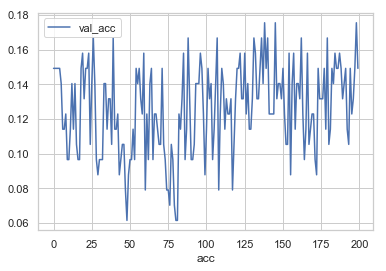

In [298]:
%%time

# model : simpleRNN
# activation : sigmoid
# loss : mse
# optimizer : sgd
# metrics : accuracy

model_RNN = Sequential()
model_RNN.add(SimpleRNN(236, input_shape=(7, 5), activation='sigmoid'))
model_RNN.add(Dense(7))
model_RNN.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
result_RNN = model_RNN.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0, callbacks=[history], validation_data=(X_test, y_test))

result_acc = result_RNN.history['val_acc']
plt.plot(result_acc)
plt.xlabel('acc')
plt.legend(['val_acc'])
plt.show

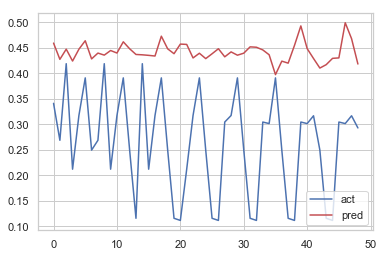

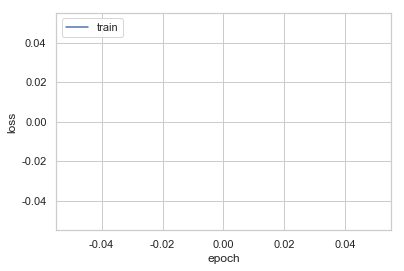

In [301]:
performance_graph(model_RNN, X_test, y_test)

##### 2nd

0.3421052673406768


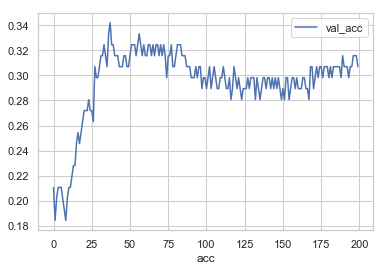

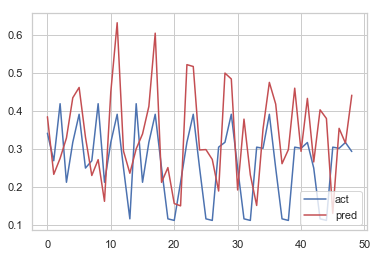

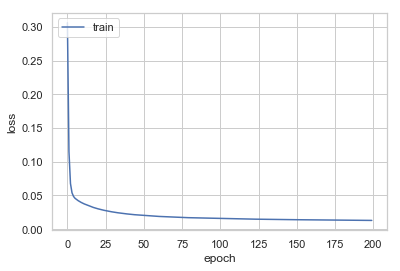

CPU times: user 24.4 s, sys: 1.93 s, total: 26.3 s
Wall time: 14.4 s


In [304]:
%%time

# model : simpleRNN
# activation : tanh
# loss : mse
# optimizer : sgd
# metrics : accuracy

model_RNN = Sequential()
model_RNN.add(SimpleRNN(236, input_shape=(7, 5), activation='tanh'))
model_RNN.add(Dense(7))
model_RNN.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy'])

result_RNN = model_RNN.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0, callbacks=[history], validation_data=(X_test, y_test))
result_acc = result_RNN.history['val_acc']
plt.plot(result_acc)
plt.xlabel('acc')
plt.legend(['val_acc'])
plt.show
print(np.max(result_acc))

performance_graph(model_RNN, X_test, y_test)

##### 3rd

0.30701755536229985


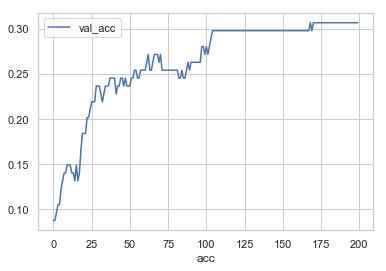

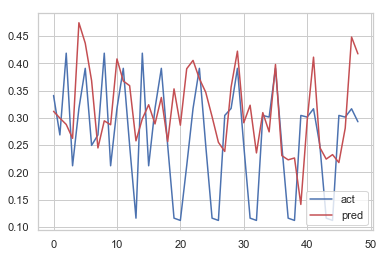

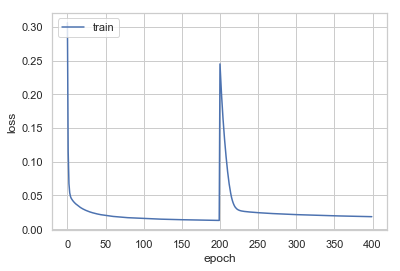

CPU times: user 24.4 s, sys: 1.83 s, total: 26.3 s
Wall time: 15.5 s


In [306]:
%%time

# model : simpleRNN
# activation : relu
# loss : mse
# optimizer : sgd
# metrics : accuracy

model_RNN = Sequential()
model_RNN.add(SimpleRNN(236, input_shape=(7, 5), activation='relu'))
model_RNN.add(Dense(7))
model_RNN.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy'])

result_RNN = model_RNN.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0, callbacks=[history], validation_data=(X_test, y_test))
result_acc = result_RNN.history['val_acc']
plt.plot(result_acc)
plt.xlabel('acc')
plt.legend(['val_acc'])
plt.show

print(np.max(result_acc))

performance_graph(model_RNN, X_test, y_test)

##### 4th

0.49122806808404756


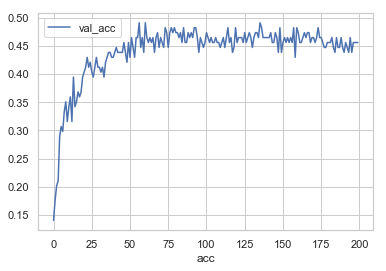

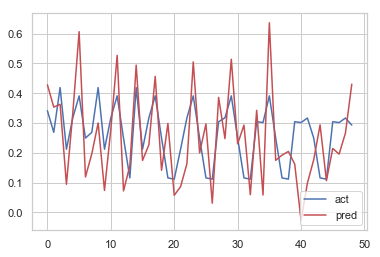

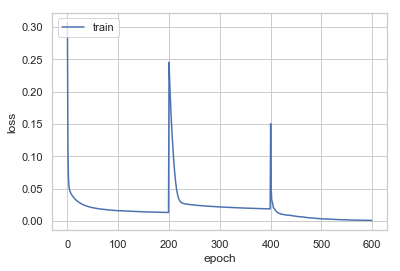

CPU times: user 25.4 s, sys: 2.03 s, total: 27.4 s
Wall time: 16 s


In [307]:
%%time

# model : simpleRNN
# activation : relu
# loss : mse
# optimizer : adam
# metrics : accuracy

model_RNN = Sequential()
model_RNN.add(SimpleRNN(236, input_shape=(7, 5), activation='relu'))
model_RNN.add(Dense(7))
model_RNN.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

result_RNN = model_RNN.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0, callbacks=[history], validation_data=(X_test, y_test))
result_acc = result_RNN.history['val_acc']
plt.plot(result_acc)
plt.xlabel('acc')
plt.legend(['val_acc'])
plt.show

print(np.max(result_acc))

performance_graph(model_RNN, X_test, y_test)

##### 5th

0.4824561309396175


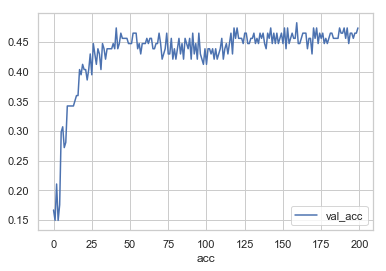

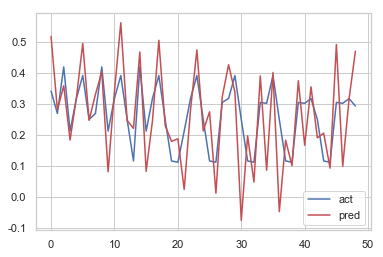

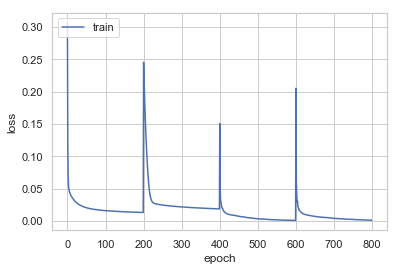

CPU times: user 26 s, sys: 2.18 s, total: 28.2 s
Wall time: 15.2 s


In [308]:
%%time

# model : simpleRNN
# activation : relu
# loss : mse
# optimizer : adam
# metrics : accuracy
# 가중치 초기화 kernel_initializer : 'glorot_normal'

model_RNN = Sequential()
model_RNN.add(SimpleRNN(236, kernel_initializer='glorot_normal', input_shape=(7, 5), activation='relu'))
model_RNN.add(Dense(7))
model_RNN.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

result_RNN = model_RNN.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0, callbacks=[history], validation_data=(X_test, y_test))
result_acc = result_RNN.history['val_acc']
plt.plot(result_acc)
plt.xlabel('acc')
plt.legend(['val_acc'])
plt.show

print(np.max(result_acc))

performance_graph(model_RNN, X_test, y_test)

In [276]:
from keras import regularizers

##### 6th

0.50877193714443


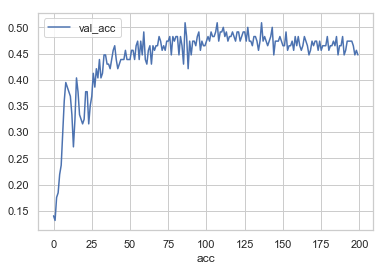

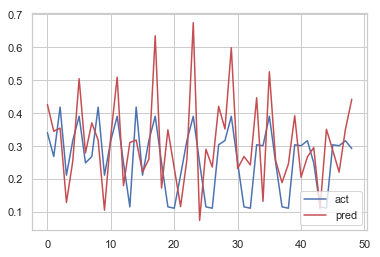

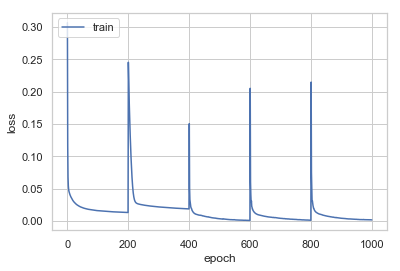

CPU times: user 26 s, sys: 2.13 s, total: 28.1 s
Wall time: 16.2 s


In [309]:
%%time

# model : simpleRNN
# activation : relu
# loss : mse
# optimizer : adam
# metrics : accuracy
# 가중치 초기화 kernel_initializer : 'glorot_normal'
# kernel_regulaizer : L2 

model_RNN = Sequential()
model_RNN.add(SimpleRNN(236, kernel_initializer='glorot_normal', \
                        kernel_regularizer=regularizers.l2(0.0001), input_shape=(7, 5), activation='relu'))
model_RNN.add(Dense(7))
model_RNN.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

result_RNN = model_RNN.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0, callbacks=[history], validation_data=(X_test, y_test))
result_acc = result_RNN.history['val_acc']
plt.plot(result_acc)
plt.xlabel('acc')
plt.legend(['val_acc'])
plt.show

print(np.max(result_acc))

performance_graph(model_RNN, X_test, y_test)

##### 7th

In [280]:
from keras.layers import Dropout

0.49999998954304475


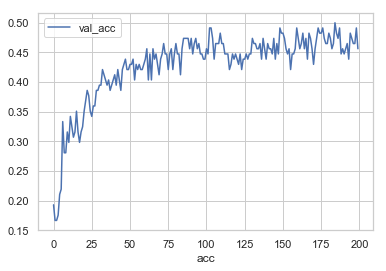

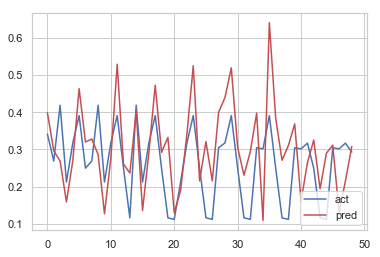

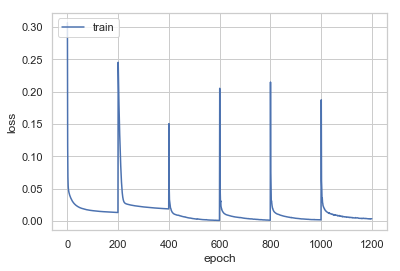

CPU times: user 26.5 s, sys: 2.2 s, total: 28.7 s
Wall time: 15.8 s


In [310]:
%%time

# model : simpleRNN
# activation : relu
# loss : mse
# optimizer : adam
# metrics : accuracy
# 가중치 초기화 kernel_initializer : 'glorot_normal'
# kernel_regulaizer : L2 
# dropout

model_RNN = Sequential()
model_RNN.add(SimpleRNN(236, kernel_initializer='glorot_normal', \
                        kernel_regularizer=regularizers.l2(0.0001), input_shape=(7, 5), activation='relu'))
model_RNN.add(Dropout(0.1))
model_RNN.add(Dense(7))
model_RNN.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

result_RNN = model_RNN.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0, callbacks=[history], validation_data=(X_test, y_test))
result_acc = result_RNN.history['val_acc']
plt.plot(result_acc)
plt.xlabel('acc')
plt.legend(['val_acc'])
plt.show

print(np.max(result_acc))

performance_graph(model_RNN, X_test, y_test)

##### 8th

In [282]:
from keras.layers import Activation, BatchNormalization

0.473684220983271


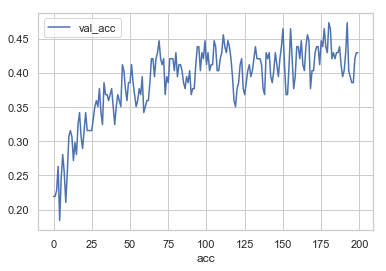

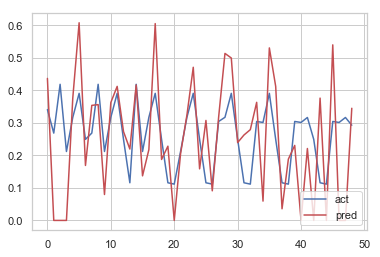

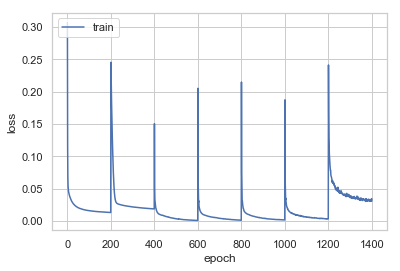

CPU times: user 33.1 s, sys: 4.24 s, total: 37.4 s
Wall time: 25.1 s


In [311]:
%%time

# model : simpleRNN
# activation : relu
# loss : mse
# optimizer : adam
# metrics : accuracy
# 가중치 초기화 kernel_initializer : 'glorot_normal'
# kernel_regulaizer : L2 
# dropout
# batch normalization

model_RNN = Sequential()
model_RNN.add(SimpleRNN(236, kernel_initializer='glorot_normal', \
                        kernel_regularizer=regularizers.l2(0.0001), input_shape=(7, 5), activation='relu'))
model_RNN.add(Dropout(0.1))
model_RNN.add(BatchNormalization())
model_RNN.add(Activation('relu'))
model_RNN.add(Dense(7))
model_RNN.add(BatchNormalization())
model_RNN.add(Activation('relu'))
model_RNN.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

result_RNN = model_RNN.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0, callbacks=[history], validation_data=(X_test, y_test))
result_acc = result_RNN.history['val_acc']
plt.plot(result_acc)
plt.xlabel('acc')
plt.legend(['val_acc'])
plt.show

print(np.max(result_acc))

performance_graph(model_RNN, X_test, y_test)

### 소결론

1. 아래 요소를 조정해봤다. 
    - model : simpleRNN
    - activation : 시그모이드, 하이퍼탄젠트, 렐루
    - loss : mse
    - optimizer : adam
    - metrics : accuracy
    - 가중치 초기화 kernel_initializer : 'glorot_normal'
    - kernel_regulaizer : L2 
    - dropout
    - batch normalization
2. 확실히 활성화함수를 시그모이드 함수에서 하이퍼탄젠트나 렐루로 바꾸니 퍼포먼스가 확 좋아졌다. 시그모이드 함수를 쓰지 말라고 하는 이유를 알 수 있었다.
3. 비용 함수는 mean square error에서 다른 것으로 바꾸면 퍼포먼스가 좋아진다고 했는데, binary_crossentropy, categorical crossentropy로 바꿔도 성능이 전혀 개선되지 않았다. 오히려 더 낮아졌다. 그 이유는 무엇인지 알아야 한다. 
4. 신경망 최적화 방법은 SGD에서 adam으로 바꾸니 또 한번 성능이 훨씬 더 좋아졌다. adam은 adaptive momentum 방법이라고 하는데, 이 방법이 왜 더 나은 퍼포먼스를 보장하는지는 아직 잘 모르겠다. 그리고 이번 데이터셋에만 더 나은 퍼포먼스를 보장할 수도 있지 않을까 라는 생각도 든다. 
5. 그리고 매번 돌릴 때마다 결과가 조금 혹은 매우 다르게 나타난다. 패러미터의 변화가 실제로 모델 성능의 변화로 이어지는지 의문을 품을 만큼. 이 부분을 어떻게 조정해야 할지 고민해야 한다.
6. 그 외 "가중치 초기화", 과적합 해결을 위한 "커널 정규화", "드랍 아웃", "배치 노말라이제이션"은 실제로 효과가 있는지 파악하기 어려웠다. 더 많은 테스트가 필요한 지점인 것 같다. 

> "비용함수", "최적화 방법", "가중치 초기화", "커널 정규화", "드랍 아웃", "배치 노말라이제이션"에 대한 이해가 필요하다.

### TO - DO

1. 모델 개선을 위해서, 남은 할 수 있는 일은 무엇일까
    1. estimator 변경 - LSTM, GRU
    2. 그리드 서치 이후, 파라미터 튜닝
    3. 전처리 변경 - Weekend를 0, 1 카테고리 데이터로 넣으면 어떻게 될까?

### Modeling (revise)

##### - LSTM

0.35964911810138767


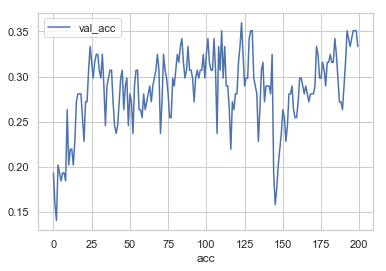

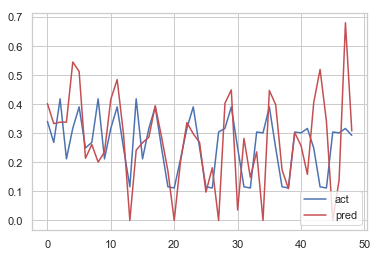

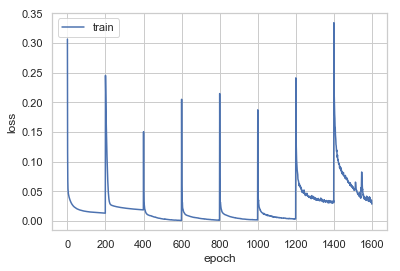

CPU times: user 1min 22s, sys: 8.94 s, total: 1min 31s
Wall time: 43.4 s


In [318]:
%%time

# model : LSTM
# activation : relu
# loss : mse
# optimizer : adam
# metrics : accuracy
# 가중치 초기화 kernel_initializer : 'glorot_normal'
# kernel_regulaizer : L2 
# dropout
# batch normalization

model_RNN = Sequential()
model_RNN.add(LSTM(236, kernel_initializer='glorot_normal', \
                        kernel_regularizer=regularizers.l2(0.0001), input_shape=(7, 5), activation='relu'))
model_RNN.add(Dropout(0.1))
model_RNN.add(BatchNormalization())
model_RNN.add(Activation('relu'))
model_RNN.add(Dense(7))
model_RNN.add(BatchNormalization())
model_RNN.add(Activation('relu'))
model_RNN.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

result_RNN = model_RNN.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0, callbacks=[history], validation_data=(X_test, y_test))
result_acc = result_RNN.history['val_acc']
plt.plot(result_acc)
plt.xlabel('acc')
plt.legend(['val_acc'])
plt.show

print(np.max(result_acc))

performance_graph(model_RNN, X_test, y_test)

##### - GRU

0.4035087593814783


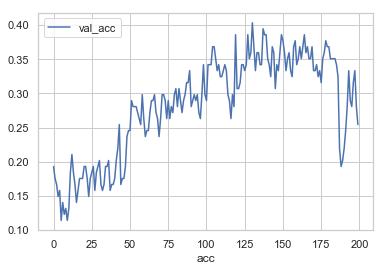

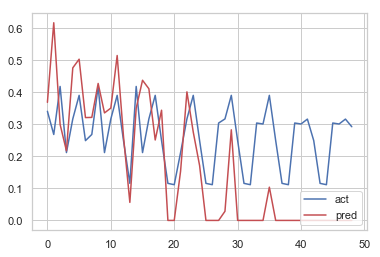

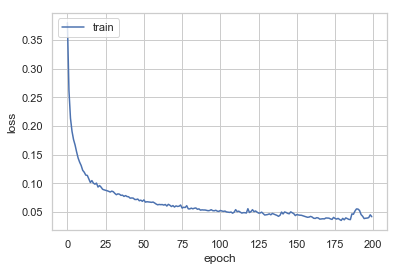

CPU times: user 1min 8s, sys: 6.51 s, total: 1min 14s
Wall time: 32.5 s


In [320]:
%%time

# model : GRU
# activation : relu
# loss : mse
# optimizer : adam
# metrics : accuracy
# 가중치 초기화 kernel_initializer : 'glorot_normal'
# kernel_regulaizer : L2 
# dropout
# batch normalization

model_RNN = Sequential()
model_RNN.add(GRU(236, kernel_initializer='glorot_normal', \
                        kernel_regularizer=regularizers.l2(0.0001), input_shape=(7, 5), activation='relu'))
model_RNN.add(Dropout(0.1))
model_RNN.add(BatchNormalization())
model_RNN.add(Activation('relu'))
model_RNN.add(Dense(7))
model_RNN.add(BatchNormalization())
model_RNN.add(Activation('relu'))
model_RNN.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

result_RNN = model_RNN.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0, callbacks=[history], validation_data=(X_test, y_test))
result_acc = result_RNN.history['val_acc']
plt.plot(result_acc)
plt.xlabel('acc')
plt.legend(['val_acc'])
plt.show

print(np.max(result_acc))

performance_graph(model_RNN, X_test, y_test)

### 의문

1. 
    - 왜 LSTM의 성능이 SimpleRNN보다 더 낮을까?
    - LSTM의 장점은 RNN보다 그래디언트 소멸 문제를 덜 겪는다는 것. 다시 말해 필요한 정보는 보존하고 불필요한 정보는 배제한다는 것이다. 

2. 
    - epochs를 50에서 200으로 늘렸더니, 과적합이 발생하기는 해도 학습은 충분히 되었다. val acc 기준 LSTM이 RNN보다 약 10% 정확도가 높게 나타났다.